## Plot (a) total terminal cost (b) total system cost vs. terminal storage amount (duration in days)

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to use for plots
folder = 'outputs 2024-08-13 stor amt'

In [4]:
# value name to plot
y_val = 'total levelized cost of hydrogen ($/kg H2)'

### READ RESULTS: Costs by pathway, process, and function

In [5]:
# read csv
f = 'output_cost by process-function.csv'
df = pd.read_csv(
    os.path.join('..\outputs', folder, f), 
    index_col='run #'
    )

# filter for sensitivity cases
df = df.loc[df['scenario'].str.contains('stor')]

# rename pathways
df['pathway'] = df['pathway'].str.replace('compressed', 'Compr.')
df['pathway'] = df['pathway'].str.replace('liquid', 'Liq.')

In [6]:
# extract output dollar year
output_dollar_year = df['output dollar year'].values[0]

output_dollar_year

2022

In [7]:
# extract columns for terminal storage amounts
cols_stor_amt = df.columns[
    df.columns.str.contains('terminal') & \
    df.columns.str.contains('storage amount')
].tolist()

# check whether storage amounts are same across pathways
check = all(
    (df[cols_stor_amt[0]] == df[cols_stor_amt[1]]) & \
    (df[cols_stor_amt[0]] == df[cols_stor_amt[2]])
)

# create new column for terminal storage duration (days)
if check == True:
    df['terminal storage duration (days)'] = df[cols_stor_amt[0]]
else:
    raise ValueError(
        'Check: Terminal storage amounts should be set equal across pathways.'
    )

In [8]:
# keep used columns
df = df[[
    'terminal storage duration (days)', 
    'pathway', 
    'process', 
    'function', 
    y_val
]]

df

,terminal storage duration (days),pathway,process,function,total levelized cost of hydrogen ($/kg H2)
run #,,,,,
3,0.25,LOHC - formic acid,preconditioning,pumping,0.000000
3,0.25,LOHC - formic acid,preconditioning,storage,0.005925
3,0.25,LOHC - formic acid,production,CO2 recycling,10.141291
3,0.25,LOHC - formic acid,production,compression,0.000000
3,0.25,LOHC - formic acid,production,pumping,0.000000
...,...,...,...,...,...
10,120.00,Liq. hydrogen,production,purchase,0.321365
10,120.00,Liq. hydrogen,reconditioning,pumping,1.220412
10,120.00,Liq. hydrogen,reconditioning,storage,0.600254


### DATA PROCESSING: Terminal storage costs by pathway

In [9]:
# filter for terminal costs
df_tml_stor = df.loc[
    (df['process'] == 'preconditioning') & \
    (df['function'] == 'storage')
]

# pivot dataframe
df_tml_stor = df_tml_stor.pivot(
    index='terminal storage duration (days)',
    columns='pathway',
    values=y_val
)

df_tml_stor

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
terminal storage duration (days),,,
0.25,0.643369,0.005925,0.296532
1.00,2.453097,0.021797,0.330518
5.00,11.860825,0.108854,0.496494
10.00,23.580971,0.215281,0.677206
30.00,70.440880,0.638436,1.132128
60.00,140.727524,1.267634,0.996906
90.00,211.011012,1.894503,2.218171
120.00,281.296683,2.516210,1.792203


### DATA PROCESSING: Total terminal costs by pathway

In [10]:
# calculate total costs by pathway and process
df_tot_proc = df.groupby(
    by=['terminal storage duration (days)', 'pathway', 'process']
)[y_val].sum().reset_index()

# filter for terminal costs
df_tml = df_tot_proc.loc[df_tot_proc['process'] == 'preconditioning']

# pivot dataframe
df_tml = df_tml.pivot(
    index='terminal storage duration (days)',
    columns='pathway',
    values=y_val
)

df_tml

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
terminal storage duration (days),,,
0.25,2.480970,0.005925,4.756577
1.00,4.238285,0.021797,4.788748
5.00,13.609840,0.108854,4.952779
10.00,25.323689,0.215281,5.134582
30.00,72.179086,0.638436,5.599017
60.00,142.464559,1.267634,5.480712
90.00,212.747653,1.894503,6.717537
120.00,283.033126,2.516210,6.308688


### DATA PROCESSING: Total system costs by pathway

In [11]:
# calculate total costs by pathway
df_tot = df.groupby(
    by=['terminal storage duration (days)', 'pathway']
)[y_val].sum().reset_index()

# pivot dataframe
df_tot = df_tot.pivot(
    index='terminal storage duration (days)',
    columns='pathway',
    values=y_val
)

df_tot

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
terminal storage duration (days),,,
0.25,6.171953,32.243546,7.242304
1.00,7.929269,32.258674,7.274475
5.00,17.300824,32.341767,7.438879
10.00,29.014673,32.443601,7.621148
30.00,75.870069,32.850851,8.087455
60.00,146.155542,33.461706,7.971977
90.00,216.438637,34.074658,9.211656
120.00,286.724109,34.685511,8.805688


### PLOT: Total terminal and system costs vs. terminal storage duration

In [12]:
# define colors (and order) for delivery pathways
pw_colors = {
    'Compr. hydrogen' : '#d95f02',
    'Liq. hydrogen' : '#1b9e77',
    'LOHC - formic acid' : '#7570b3',
    }

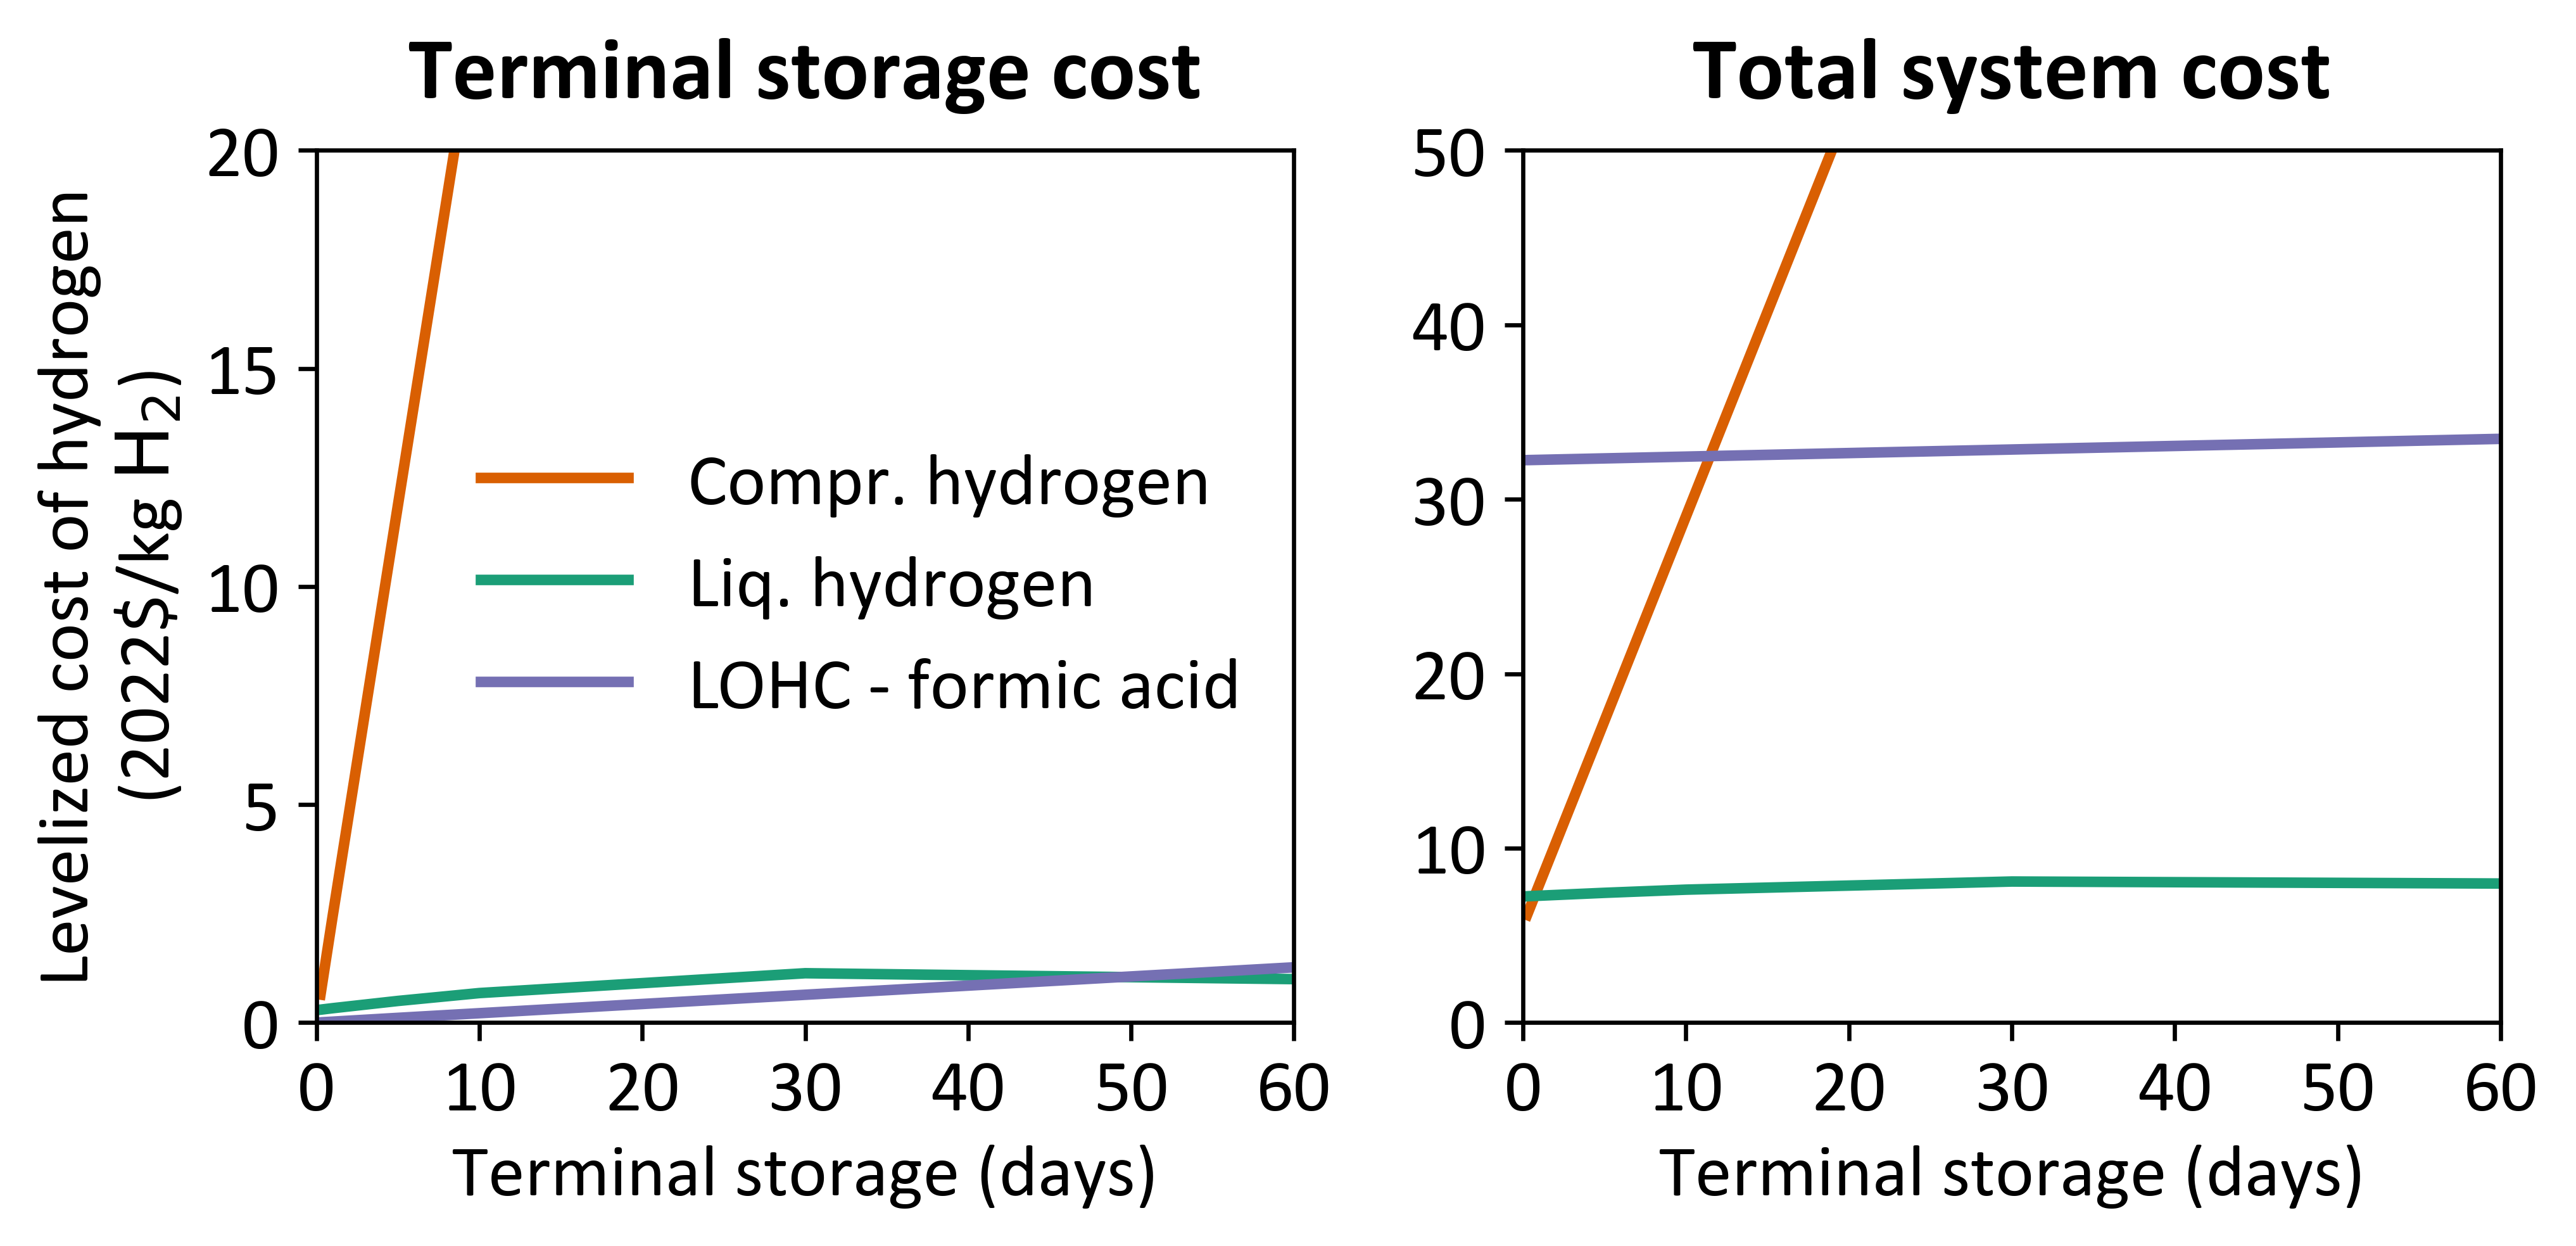

In [13]:
# create subplots
fig, axes = plt.subplots(
    figsize=(7, 3.5),
    ncols=2,
    layout='tight',
    dpi=600
    )

for pw, color in pw_colors.items():

    # plot terminal storage costs
    df_tml_stor[pw].plot(
        ax=axes[0],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 201, 10),
        xlim=(0, 60),
        xlabel='Terminal storage (days)',
        ylabel='Levelized cost of hydrogen\n' + \
            '({:0.0f}\\$/kg'.format(output_dollar_year) + \
            ' ${H_2}$)',
        yticks=np.arange(0, 101, 5),
        ylim=(0, 20),
        )
    
    # # plot total terminal costs
    # df_tml[pw].plot(
    #     ax=axes[1],
    #     linewidth=2.0,
    #     color=color,
    #     xticks=np.arange(0, 201, 10),
    #     xlim=(0, 60),
    #     xlabel='Terminal storage (days)',
    #     yticks=np.arange(0, 101, 5),
    #     ylim=(0, 20),
    #     )

    # plot total system costs
    df_tot[pw].plot(
        ax=axes[1],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 201, 10),
        xlim=(0, 60),
        xlabel='Terminal storage (days)',
        yticks=np.arange(0, 101, 10),
        ylim=(0, 50),
        )

# update subplot title
axes[0].set_title(
    'Terminal storage cost',
    pad=10,
    fontweight='bold',
)

# axes[1].set_title(
#     'Total terminal cost',
#     pad=10,
#     fontweight='bold',
# )

axes[1].set_title(
    'Total system cost',
    pad=10,
    fontweight='bold',
)

# update legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

axes[0].legend(
    handles=handles, 
    labels=labels, 
    frameon=False, 
    bbox_to_anchor=(0.1, 0.5), 
    loc='center left'
    )

# save plot
plt.savefig(
    'total costs vs tml stor amt.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()